Here goes our code to find the 100 most frequent words in a file

In [36]:
import matplotlib.pyplot as plt
import os

def traverse_directory(path):
    return [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

path = "corpus"
onlyfiles = []
files_and_directories = os.listdir(path)
for f in files_and_directories:
    fpath = os.path.join(path, f)

    if os.path.isfile(fpath):
        onlyfiles.append(fpath)

def tokenize_file(path):
    f = open(path)
    content = f.read()
    tokens = content.split()
    normalized_tokens = []
    for token in tokens:
        item = token.lower().strip(".,?!-=[]()@1234567890")
        if(item != "" and not "'" in item):
            normalized_tokens.append(item)
            tokens = ""
            

    return normalized_tokens


def compute_counts(pathlist):
    counts = {}
    for path in pathlist:
        tokens = tokenize_file(path)
        for word in tokens:
            if word in counts:
                counts[word] = counts[word] + 1
            else:
                counts[word] = 1
    return counts


def sort_counts(counts):
    sorted_tuples = sorted(counts.items(), key=lambda item: item[1], reverse=True)
    return sorted_tuples


def get_frequencies(counts, num_words):
    frequencies = {}
    rank = 1
    for word in counts:
        frequencies[rank] = word[1]/num_words
        rank += 1
        if rank == 101:
            break
    return frequencies


Now we upload the corpus files

In [51]:
corpus = traverse_directory("corpus")

normalized_tokens = tokenize_file(path + "/tv_text.txt")
counts = compute_counts(corpus)
counts_sorted = sort_counts(counts)
frequencies = get_frequencies(counts_sorted, len(normalized_tokens))

corpus_shakespeare = traverse_directory("shakespeare_corpus")

counts_shakespeare = compute_counts(corpus_shakespeare)
num_tokens = sum(counts_shakespeare.values())
counts_sorted_shakespeare = sort_counts(counts_shakespeare)
frequencies_shakespeare = get_frequencies(counts_sorted_shakespeare, num_tokens)

Eventually, we create two plots, showing the frequencies of the 100 most used words in contemporary spoken English (left) and the 100 most used words in Shakespeares work (right). The red line shows how the frequencies should look, according to Zipf's law.

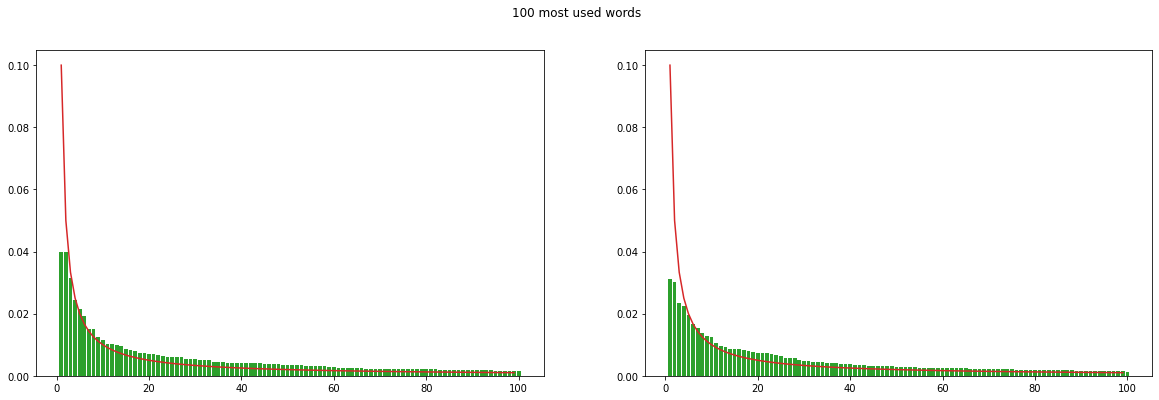

In [53]:

figure, ax = plt.subplots(1, 2, figsize=(20,6))
figure.suptitle("100 most used words")


x = frequencies.keys()
y = frequencies.values()
xs = frequencies_shakespeare.keys()
ys = frequencies_shakespeare.values()
x1 = range(1, 100)
f1 = [ 0.1/x for x in x1 ]
ax[0].plot(x1, f1, c="tab:red")
ax[0].bar(x, y, color="tab:green")
ax[1].plot(x1, f1, c="tab:red")
ax[1].bar(xs, ys, color="tab:green")
plt.show()